# 2D K-Means Clustering for Top 30 Areas

## Dimensions: Pickup Latitude (x) and Longitude (y)

In [ ]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import scipy as sci
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot
from copy import deepcopy

## Read Data for Top 30 Areas

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

np.random.seed(5)
data = pd.read_csv('dataset_kmeans_clustering_top30.csv')
print(data.shape)
data.head()

## Convert a dataframe to a list and Plot them into Scatter 

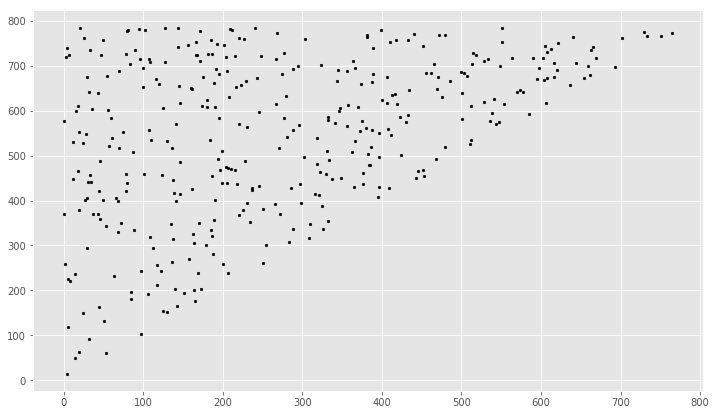

In [64]:
g1 = data['pickup_lat'].values
g2 = data['pickup_lon'].values
X = np.array(list(zip(g1, g2))) 
plt.scatter(g1, g2, c='black', s=7)

## Find the optimal 'k' applying Elbow Method 

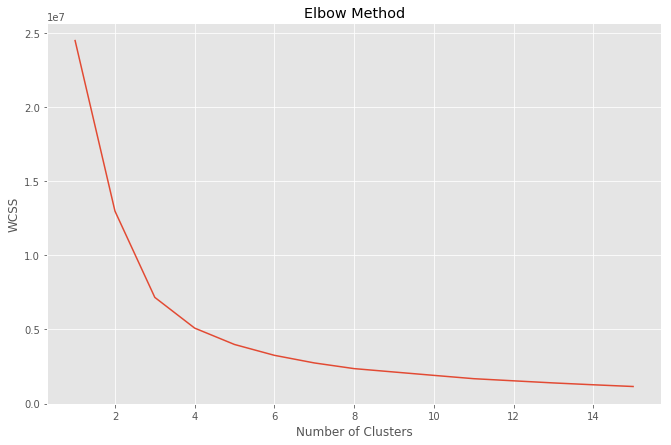

In [128]:
#  Slice two columns, pickup_lan and pickup_lon, of data and convert them into a list respectively applying .values
X=data.iloc[:, [0,1]].values  
# print(X)

#  Find the optimal number of clusters (totoal no. of clusters = 15)
wcss = []    # wcss: Within Clusters Sum of Squares'
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ = float: Sum of squared distances of samples to their closest cluster center.
     
plot.plot(range(1,16), wcss)   # x-axis: range(1,11), y-axis: wcss
plot.title("Elbow Method")
plot.xlabel('Number of Clusters')
plot.ylabel('WCSS')
plot.show()

## Determine Clusters with their Centroids

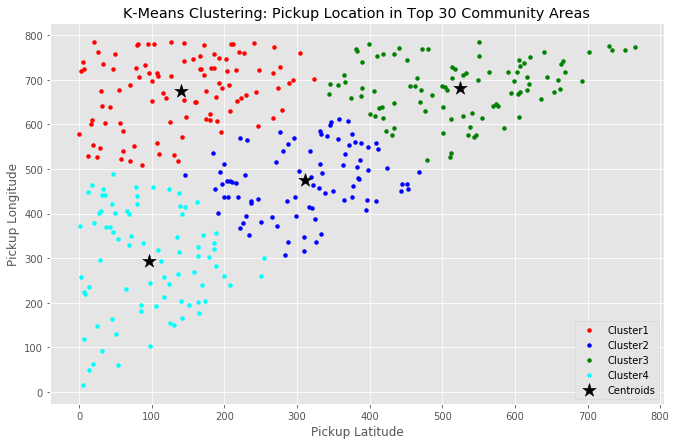

In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

y = kmeans.fit_predict(X)

plot.scatter(X[y == 0,0], X[y == 0,1], s= 15, c='red', label = 'Cluster1')
plot.scatter(X[y == 1,0], X[y == 1,1], s= 15, c='blue', label = 'Cluster2')
plot.scatter(X[y == 2,0], X[y == 2,1], s= 15, c='green', label = 'Cluster3')
plot.scatter(X[y == 3,0], X[y == 3,1], s= 15, c='cyan', label = 'Cluster4')

plot.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s= 200, marker='*',c = 'black', label='Centroids')

# print('count_pickup_loc: ', kmeans.cluster_centers_[:, 2])
plot.title("K-Means Clustering: Pickup Location in Top 30 Community Areas")
plot.xlabel('Pickup Latitude')
plot.ylabel('Pickup Longitude')
plot.legend()
plot.show()

## Print the values of centroids for all clusters

In [134]:
# print('centroids_pickup_lat(x): ', kmeans.cluster_centers_[:, 0])
# print('centroids_pickup_lon(y): ', kmeans.cluster_centers_[:, 1])
print('Centroids : ', kmeans.cluster_centers_)

Centroids :  [[139.75247525 674.48514851]
 [311.33333333 474.06896552]
 [524.0212766  682.17021277]
 [ 95.85185185 293.54320988]]
